Importando biblioteca

In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importação do arquivo

In [4]:
temp = pd.read_csv('/content/Celsius-to-Fahrenheit.csv')
#Dropa índice caso existe, e substitui o índice resetado
temp.reset_index(drop = True, inplace = True)
temp

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


Visualização do gráfico

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


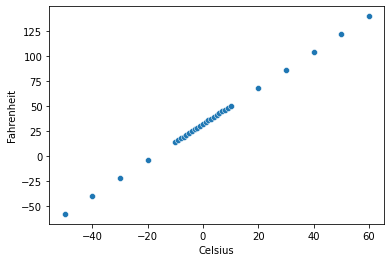

In [7]:
sns.scatterplot(temp['Celsius'], temp['Fahrenheit']);

Configuração da base de dados

In [25]:
X_train = temp['Celsius']
y_train = temp['Fahrenheit']

Construção e treinamento do modelo

In [22]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape = [1]))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [33]:
epochs_hist = model.fit(X_train,y_train,epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 0s 8ms/step - loss: 8.9226
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 8.8029
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 8.6846
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 8.5677
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 8.4522
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 8.3382
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 8.2255
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 8.1143
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 8.0043
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 7.8958
Epoch 11/1000
1/1 [==============================] - 0s 13ms/step - loss: 7.7885
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 7.6826
Epoch 13/1000
1/1 [=========================

Avaliação de modelo

In [34]:
epochs_hist.history.keys()

dict_keys(['loss'])

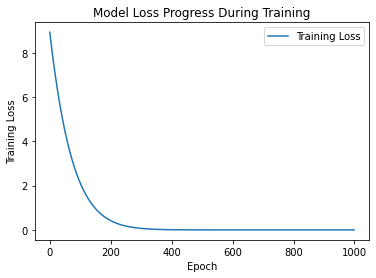

In [35]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [36]:
model.get_weights()

[array([[1.8000002]], dtype=float32), array([31.99995], dtype=float32)]

In [37]:
temp_c = 0
temp_f = model.predict([temp_c])
temp_f

array([[31.99995]], dtype=float32)

In [38]:
temp_f1 = 9/5 * temp_c +32
temp_f1

32.0